In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import healpy as hp

In [2]:
# File downloaded from https://lambda.gsfc.nasa.gov/product/foreground/fg_ovrolwa_radio_maps_get.html
filepath = "/Users/ruby/Astro/mmode_maps_eastwood/ovro_lwa_sky_map_73.152MHz.fits"
file_contents = fits.open(filepath)
map_data = np.array(file_contents[1].data, dtype=float)

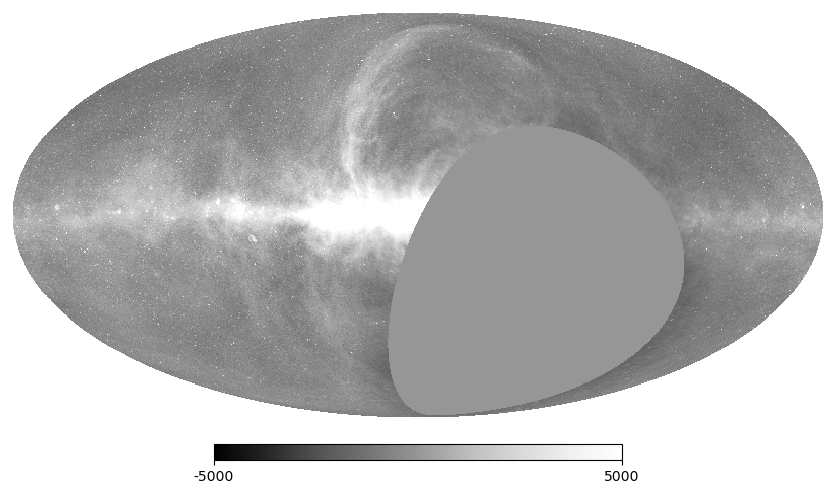

In [3]:
# Plot map in Galactic coordinates
proj = hp.mollview(
    map=map_data,
    coord=file_contents[1].header["COORDSYS"],
    nest=False,
    title="",
    min=-5000,
    max=5000,
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

In [4]:
# If the map parameter nest=True, need to reorder:
#map_data = hp.pixelfunc.reorder(map_data, n2r=True)
lmax = 10
a_vals = hp.sphtfunc.map2alm(map_data, lmax=lmax)  # Get spherical harmonic amplitudes
l_vals, m_vals = hp.sphtfunc.Alm.getlm(lmax)  # Get spherical harmonic indices
lmax_check = hp.sphtfunc.Alm.getlmax(len(a_vals))  # Potentially useful function

In [5]:
print(l_vals)

[ 0  1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  2  3  4
  5  6  7  8  9 10  3  4  5  6  7  8  9 10  4  5  6  7  8  9 10  5  6  7
  8  9 10  6  7  8  9 10  7  8  9 10  8  9 10  9 10 10]


In [6]:
print(m_vals)

[ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  5  5  5
  5  5  5  6  6  6  6  6  7  7  7  7  8  8  8  9  9 10]


In [7]:
print(a_vals)

[   92.96215466  +0.j          -199.5519971   +0.j
 -1638.0823004   +0.j             5.84758999  +0.j
  1359.59962029  +0.j           206.6580708   +0.j
  -935.77044927  +0.j           -73.96906992  +0.j
   706.38094388  +0.j            60.02634992  +0.j
  -643.9326288   +0.j          -994.98005268+792.66808633j
  -201.62066631+319.7740317j    316.88436032-532.62941094j
   116.74122067 -44.76001616j  -392.85464836+386.10465001j
   -54.74576035 +68.91185616j   391.28886795-318.06462911j
    75.03474138 -35.88840071j  -359.26544301+298.99211263j
   -29.04253664 +54.1905806j    410.0779342 -345.71483176j
   109.63359628-178.23189397j  -319.55737007+407.40010625j
    66.83388693-145.73798347j   313.38620672-410.12412928j
    26.71048979 -26.38701637j  -249.47957735+383.18789101j
    76.37937901 -31.80208846j   231.64440184-223.64706221j
  -165.08008887+652.58410245j    36.37678267 +37.77997618j
   218.2073287 -207.96045883j    24.44142207  -6.00863122j
  -181.97447899+335.91035742j    -8.2